# **Finding Lane Lines on the Road** 

<i>Clark Hochgraf
<br>Dec 29, 2019</i>

The goals / steps of this project are the following:
* Make a pipeline that finds lane lines on the road from a color image.
* Reflect on the performance of the pipeline and potential enhancements

[//]: # (Image References)

[image1]: ./examples/grayscale.jpg "Grayscale"
[image2]: ./test_images/solidWhiteCurve.jpg "Solid White Curve"


---

## Reflection

### 1.Description of Pipeline, including modification of the draw_lines() function.
    
My pipeline consisted of 7 steps. At each stage the image output was renamed for clarity e.g. for the conversion to grayscale, the image became img_g. 

* The image was converted from color to grayscale (img_g). 
* Next, the image was blurred with a gaussian filter with 9x9 kernel (img_gb). 
* Canny edge detection was applied with a low threshold of 40, and high of 80 (img_gbc). 
* The vertices of a region of interest were found and applied to mask of the region where lane lines are expected while ignoring other regions of the image (img_gbcr). 

* Then a hough transform was used to find lines in the image (img_gbcrl).
* Then the lines were grouped into left lanes and right lanes, and averaged into a single left or right lane for each frame. The slope and offset of each lane was put into a 10 frame buffer and the average of the lane slope and offset over the last 10 frames was used to define the lanes.
* Finally, the average lines were then overlayed on the original image (img_gbcrlw).

In order to draw a single line on the left and right lanes, I modified the <strong>draw_lines()</strong> function so that only lines that fit into a model of "left lane" or "right lane" were kept. First the slope and offset of each line was found, lines with slopes and offsets that were not "left lane" or "right lane" were discarded. The average slope and offset was found for the remaining left lane lines and then the right lane lines. 


---
<img src="test_videos_output/img_g.jpg" width="480" alt="img_g" />
<img src="test_videos_output/img_gb.jpg" width="480" alt="img_gb" />
<img src="test_videos_output/img_gbc.jpg" width="480" alt="img_gbc" />
<img src="test_videos_output/img_gbcr.jpg" width="480" alt="img_gbcr" />
<img src="test_videos_output/img_gbcrl.jpg" width="480" alt="img_gbcrl" />
<img src="test_videos_output/img_gbcrlw.jpg" width="480" alt="final lane marker on original image" />



### 2. Shortcomings with current pipeline


A few noticeable shortcoming of the current pipeline include:
1. In the road videos, the lane marker line overlay is jittery, jumping around from frame to frame, if no frame to frame averaging is used. Using the 10 frame buffering cleans this up, but will introduce a time delay/lag that could affect steering response later. 
2. When the lane contrast is low, such as in the challenge video where a yellow lane goes over a concrete bridge, the hough transform can fail to detect the lane. This can be noticed as the lane line holds a fixed position for a number of video frames and then jumping to the correct lane location once the lane image has sufficient contrast.
3. The lane markers are at times longer than the lane in the image. 
4. The lane markers are straight lines and do not match the curvature of the lane.
5. The thresholds for region of interest, canny, are hardcoded.
6. If no lines are detected in the image, a run-time error NONETYPE will occur in the draw_lines() function


### 3. Possible improvements to pipeline

To address these shortcomings, the following improvements could be made:
1. For the jittery lane markers, instead of using a 10 frame buffer, a low pass filter with lower delay could be used to smooth the lane marking locations, improving the visual display of the lane marker, while taking care to avoid introducing stability or response time issues when steering control is implemented. 
2. Improved contrast through analysis in the color space might make it easier to detect a faded yellow lane on concrete.
3. The lane marker length could be fine tuned based on information such as image size/shape, output of canny and hough transforms
4. The lane markers could be modified to be curved lines or segmented lines.
5. The thresholds could be parameterized for more convenient tuning.
6. Add error handling for the case where no lines are detected in an image.

# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**


<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


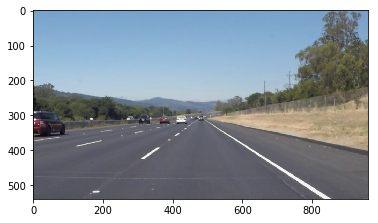

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', 
#for example, call as plt.imshow(gray, cmap='gray')


## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def get_region_of_interest_vertices(img_gbc):
    r=img_gbc.shape[0] # rows or height
    c=img_gbc.shape[1] # columns or width
    left_bottom = [0, r]
    right_bottom = [c, r]
    left_top = [0.95*c/2, 1.2*r/2] # trapezoid with 10% width at top
    right_top = [1.05*c/2, 1.2*r/2]
    x=np.array([[left_bottom,left_top,right_top,right_bottom]], dtype=np.int32)
    return x

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, a=0.8, b=1., gamma=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, a, img, b, gamma)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [4]:
import os
os.listdir("test_images/")

['solidYellowCurve.jpg',
 'solidYellowLeft.jpg',
 'solidYellowCurve2.jpg',
 'solidWhiteRight.jpg',
 'one_frame.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidWhiteCurve.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960)


Text(0.5,1,'grayscale with blur')

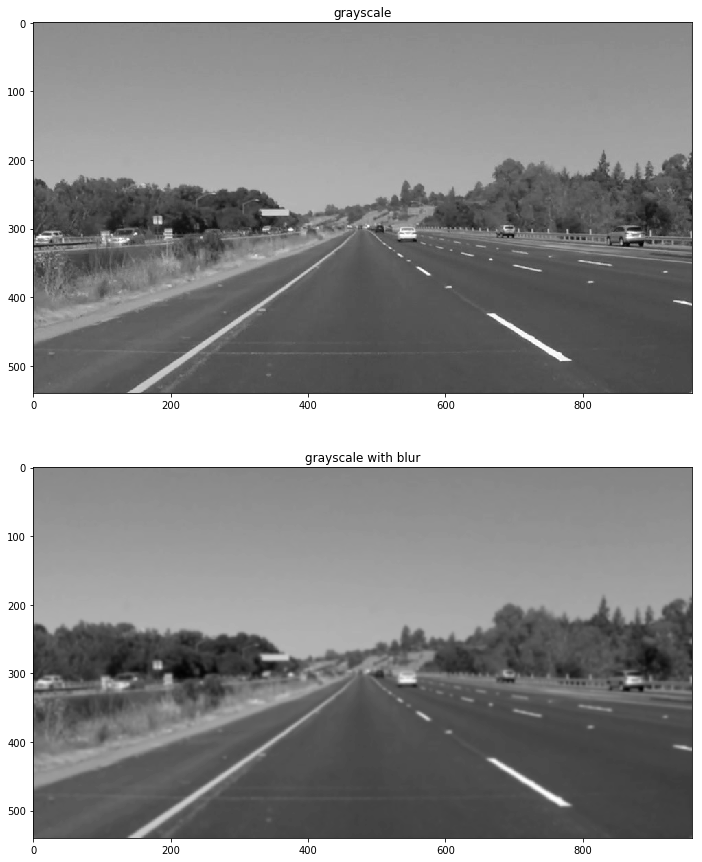

In [5]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

#img = mpimg.imread('test_images/solidWhiteRight.jpg')
#img = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')
#img = mpimg.imread('test_images/solidYellowCurve2.jpg')
img = mpimg.imread('test_images/solidYellowLeft.jpg')
#img = mpimg.imread('test_images/frame69.jpg')

cv2.imwrite("test_videos_output/img.jpg",img)

img_g= grayscale(img)
cv2.imwrite("test_videos_output/img_g.jpg",img_g)
#printing out some stats and plotting
print('This image is:', type(img_g), 'with dimensions:', img_g.shape)
#plt.imshow(img_g,cmap='gray')  

img_gb=gaussian_blur(img_g, 9)
cv2.imwrite("test_videos_output/img_gb.jpg",img_gb)
#plt.imshow(img_g,cmap='gray')  
# if you wantmple, call as plt.imshow(gray, cmap='gray')
#plt.title('grayscale with blur', fontdict=None, loc='center')

plt.rcParams["figure.figsize"] = (15,15) # set figure size to 20cmx20cm
f, axisArray = plt.subplots(2,1)
axisArray[0].imshow(img_g,cmap='gray')
axisArray[0].title.set_text('grayscale')
axisArray[1].title.set_text('grayscale with blur')
axisArray[1].imshow(img_gb,cmap='gray')
plt.title('grayscale with blur', fontdict=None, loc='center')
#doeasn't work # plt.subplot_tool()


### Image with canny applied

True

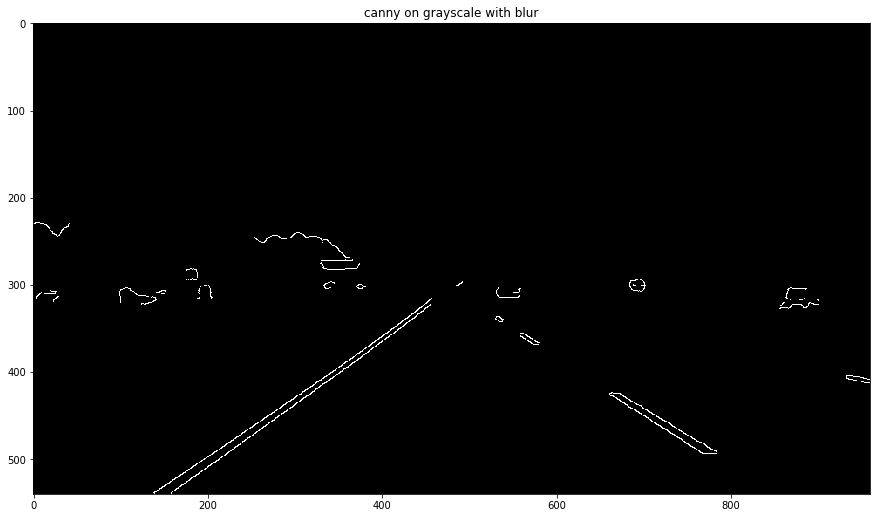

In [6]:
img_gbc=canny(img_gb, 100, 200);
plt.imshow(img_gbc,cmap='gray') 
plt.title('canny on grayscale with blur', fontdict=None, loc='center')
cv2.imwrite("test_videos_output/img_gbc.jpg",img_gbc)

### Apply region of interest filter to image

(540, 960)


True

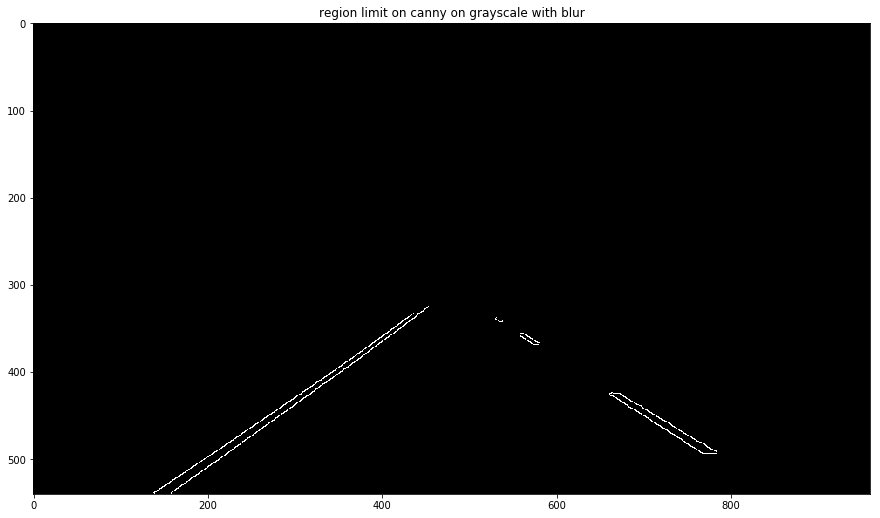

In [7]:
print(img_gbc.shape)
r=img_gbc.shape[0] # rows or height
c=img_gbc.shape[1] # columns or width
left_bottom = [0, r]
right_bottom = [c, r]
left_top = [0.95*c/2, 1.2*r/2] # trapezoid with 10% width at top
right_top = [1.05*c/2, 1.2*r/2]
x=np.array([[left_bottom,left_top,right_top,right_bottom]], dtype=np.int32)
#sample array a = np.array( [[[10,10],[100,10],[100,100],[10,100]]], dtype=np.int32 )
img_gbcr=region_of_interest(img_gbc,x)
plt.imshow(img_gbcr,cmap='gray') 
plt.title('region limit on canny on grayscale with blur', fontdict=None, loc='center')
cv2.imwrite("test_videos_output/img_gbcr.jpg",img_gbcr)

### Find lanes and show on image

True

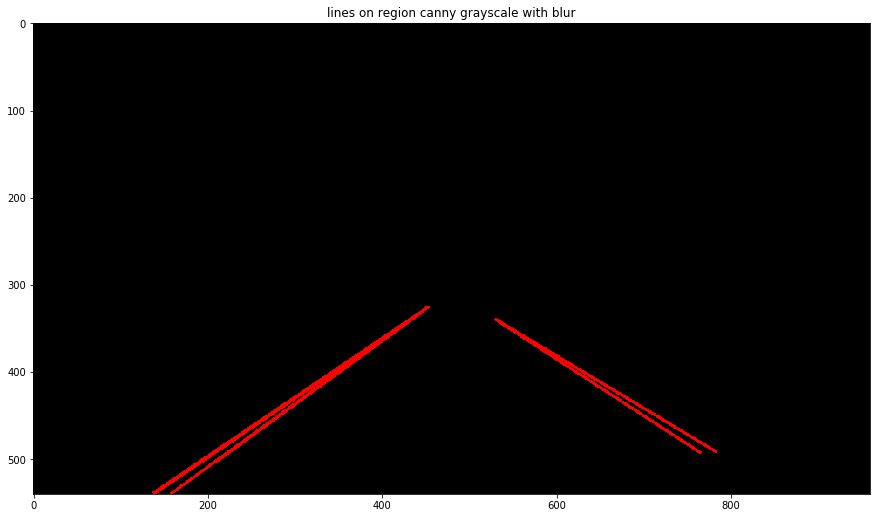

In [8]:
img_gbcrl=hough_lines(img_gbcr, 1, np.pi/180.0, 100, img_gbcr.shape[0]*1.4*0.1, img_gbcr.shape[0]*1.4*0.55)
plt.imshow(img_gbcrl,cmap='gray') 
plt.title('lines on region canny grayscale with blur', fontdict=None, loc='center')
cv2.imwrite("test_videos_output/img_gbcrl.jpg",img_gbcrl)

In [9]:
print(img_gbc.shape)

(540, 960)


In [10]:
int(img_gbcr.shape[0]*1.4*0.2)

151

### Print line points (x,y pairs) as diagnostic

In [11]:

lines = cv2.HoughLinesP(img_gbc, 1, np.pi/180.0, int(img_gbcr.shape[0]*.06), np.array([]), img_gbcr.shape[0]*1.4*0.1, img_gbcr.shape[0]*1.4*0.55)
print(lines)

[[[209 503 491 298]]

 [[235 474 425 341]]

 [[158 539 492 297]]

 [[530 339 767 493]]

 [[139 539 452 320]]

 [[530 338 783 490]]

 [[578 368 783 491]]

 [[103 304 887 304]]

 [[297 440 421 350]]

 [[  3 314 864 314]]

 [[100 313 372 280]]

 [[158 538 489 298]]

 [[138 538 366 384]]

 [[ 24 242 901 319]]

 [[299 241 888 324]]

 [[  7 310 888 325]]

 [[  8 309 701 297]]]


## Psuedo code for finding slope and offset of each line from hough transform
Y = (rho - aX)/b

X= (rho - bX)/a

Where a = cos(theta) and b = sin(theta)

Now just sub in the intersects you want to find

[fX(Y=0), fY(X=0) | fX(Y=image height), fY(X=image width)]

<code>
def getSlope((x1, y1), (x2, y2)):
    return (y2-y1)/(x2-x1)
    
def getYInt((x1, y1), (x2, y2)):
    slope = getSlope((x1, y1), (x2, y2))
    y = -x1*slope+y1
    return (0, y)

slope((7, 3), (2, 9))
-1.2

getYInt((7, 3), (2, 9))
(0, 11.4)
</code>

## Helper functions for slope calculation

In [12]:
def getSlope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)
    
def getYInt(x1, y1, x2, y2):
    slope = getSlope(x1, y1, x2, y2)
    y = -x1*slope+y1
    return (0, y)

## Filter the lane lines by restricting valid range slope and offset of lines
The left lane slope must be between -1.5 to -0.5 while the intercept must be greater than 90% of the image height. Prints the slope and offset valid lines.

validated lines left
m= -0.7269503546099291  b=  654.9326241134752
m= -0.7  b=  638.5
m= -0.7245508982035929  b=  653.4790419161677
m= -0.6996805111821086  b=  636.2555910543131
m= -0.7258064516129032  b=  655.5645161290322
m= -0.7250755287009063  b=  652.5619335347432
m= -0.6754385964912281  b=  631.2105263157895
[ -0.7110718 646.0721   ]
validated lines right
m= 0.6497890295358649  b=  -5.388185654008396
m= 0.6007905138339921  b=  19.581027667984188
m= 0.6  b=  21.19999999999999
[ 0.61685985 11.797615  ]


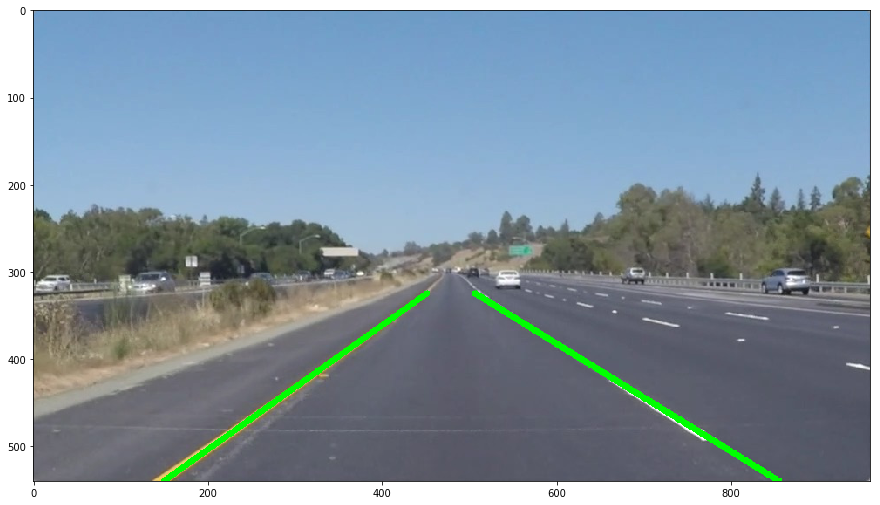

In [13]:
# find slope and offset of each line
lane_left_mb,lane_right_mb,mb_list=([] for _ in range(3))

for line in lines:
    for x1,y1,x2,y2 in line:
        m=getSlope(x1, y1, x2, y2)
        b=getYInt(x1, y1, x2, y2)
       # print('m=',m,' b= ',b)
        if -1.5  <= m < -0.5 and int(img.shape[0]*0.9)  <= b[1] :
           # lane_left_mb.append(line)
            lane_left_mb.append((m,b[1]))
        if 0.3  <= m < 2.5 and  b[1]<int(img.shape[0]*0.3) :
            lane_right_mb.append((m,b[1]))
       # cv2.line(img, (x1, y1), (x2, y2), color=(0,0,255), thickness=2)
plt.imshow(img,cmap='gray') 
                      
print('validated lines left')
for mb in lane_left_mb:
    print('m=',mb[0],' b= ',mb[1])
ll_npa = np.asarray(lane_left_mb, dtype=np.float32) # convert list to array so we can use mean
print(ll_npa.mean(0))

print('validated lines right')
for mb in lane_right_mb:
    print('m=',mb[0],' b= ',mb[1])
rl_npa = np.asarray(lane_right_mb, dtype=np.float32) # convert list to array so we can use mean
print(rl_npa.mean(0))

# m=rl_npa.mean(0)[0]
# b=rl_npa.mean(0)[1]
# y= mx +b
# (y-b)/m=x

# plot one lane line for each side (right,left)
x1=int((img.shape[0]-rl_npa.mean(0)[1])/rl_npa.mean(0)[0])
x2=int((int(1.2*img.shape[0]/2.0)-rl_npa.mean(0)[1])/rl_npa.mean(0)[0])
cv2.line(img, (x1,img.shape[0] ), (x2, int(1.2*img.shape[0]/2.0)), color=(0,255,0), thickness=6)
# left lane
x1=int((img.shape[0]-ll_npa.mean(0)[1])/ll_npa.mean(0)[0])
x2=int((int(1.2*img.shape[0]/2.0)-ll_npa.mean(0)[1])/ll_npa.mean(0)[0])
cv2.line(img, (x1,img.shape[0] ), (x2, int(1.2*img.shape[0]/2.0)), color=(0,255,0), thickness=6)
plt.imshow(img,cmap='gray') 

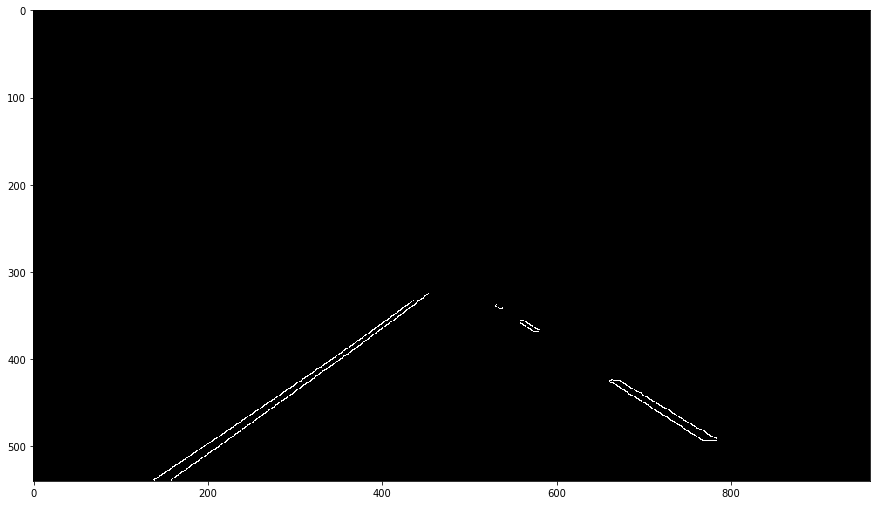

In [14]:
plt.imshow(img_gbcr,cmap='gray') 

Text(0.5,1,'overlay lines on original image')

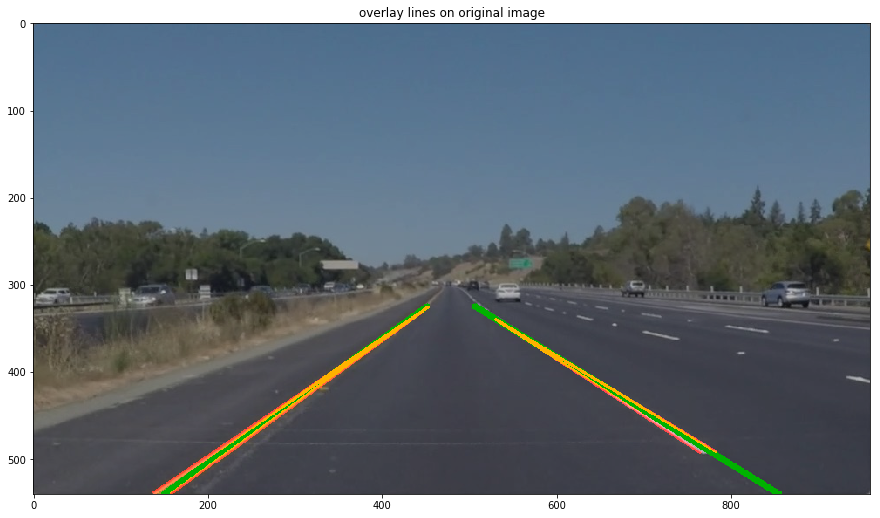

In [15]:
img_gbcrlw=weighted_img(img_gbcrl, img, a=.7, b=1, gamma=0.0)
plt.imshow(img_gbcrlw,cmap='gray') 
plt.title('overlay lines on original image', fontdict=None, loc='center')

## Redefine helper functions for draw_lines

In [16]:
from collections import deque
m_left_deque = deque(maxlen=10)      # make a new deque with 10 items to store slope m for left lane
b_left_deque = deque(maxlen=10)      # store offset b for left lane
m_right_deque = deque(maxlen=10)      # make a new deque with 10 items to store slope m for right lane
b_right_deque = deque(maxlen=10)      # store offset b for right lane

In [17]:
def getSlope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)
    
def getYInt(x1, y1, x2, y2):
    slope = getSlope(x1, y1, x2, y2)
    y = -x1*slope+y1
    return (0, y)

def draw_lines(img, lines, color=[0, 255, 0], thickness=6):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """

    if not hasattr(draw_lines, "x1_l_past"):
        draw_lines.x1_l_past=0
        draw_lines.x2_l_past=0
        draw_lines.x3_past=0
        draw_lines.x4_past=0
    if not hasattr(draw_lines, "x3_past"):
        draw_lines.x1_l_past=0
        draw_lines.x2_l_past=0
        draw_lines.x3_past=0
        draw_lines.x4_past=0

         
    lane_left_mb,lane_right_mb,mb_list=([] for _ in range(3))

    # find slope and offset of each line   
    # separate  lines into left lane lines and right lane lines
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            m=getSlope(x1, y1, x2, y2)
            b=getYInt(x1, y1, x2, y2)
            #print('m=',m,' b= ',b)
            #if -1.0  <= m < -0.5 and 500  <= b[1] :
               # lane_left_mb.append(line)
            #    lane_left_mb.append((m,b[1]))
            #if 0.3  <= m < 2 and  b[1]<200 :
            #    lane_right_mb.append((m,b[1]))
            if -1.5  <= m < -0.5 and int(img.shape[0]*0.9)  <= b[1] :
           # lane_left_mb.append(line)
                lane_left_mb.append((m,b[1]))
            if 0.3  <= m < 2.5 and  b[1]<int(img.shape[0]*0.3) :
                lane_right_mb.append((m,b[1]))
       # cv2.line(img, (x1, y1), (x2, y2), color=(0,0,255), thickness=2)            

    #plt.imshow(img,cmap='gray') 
    
    #print('validated lines left')
    #for mb in lane_left_mb:
    #    print('m=',mb[0],' b= ',mb[1])
    
    # average all lines to get one average line for left and one for right
    if lane_left_mb:
        ll_npa = np.asarray(lane_left_mb, dtype=np.float32) # convert list to array so we can use mean
        # average m value = ll_npa.mean(0)[0]
        # average b value = ll_npa.mean(0)[1]
        # moving average filter the values of m and b
        
        m_left=ll_npa.mean(0)[0]
        b_left=ll_npa.mean(0)[1]
        
        m_left_deque.append(m_left)
        b_left_deque.append(b_left)
        
        msum=0
        bsum=0
        for i in range(len(m_left_deque)):                   # iterate over the deque's elements
            msum=msum+m_left_deque[i]
            bsum=bsum+b_left_deque[i]
        m_left=float(msum/len(m_left_deque))  # average value of m from values in stored queue
        b_left=float(bsum/len(b_left_deque))  
        
        # compute x1 and x2 for line. Note that y1 and y2 are fixed (lower left to halfway up)
        # x= (y-b)/m
        x1_l=int((img.shape[0]-b_left)/m_left)
        x2_l=int((int(1.2*img.shape[0]/2.0)-b_left)/m_left)
        draw_lines.x1_l_past=x1_l
        draw_lines.x2_l_past=x2_l
        cv2.line(img, (x1_l,img.shape[0] ), (x2_l, int(1.2*img.shape[0]/2.0)), color=(0,255,0), thickness=6)
    else:
        cv2.line(img, (draw_lines.x1_l_past,img.shape[0] ), (draw_lines.x2_l_past, int(1.2*img.shape[0]/2.0)), color=(0,255,0), thickness=6)

    #print('validated lines right')
    #for mb in lane_right_mb:
    #    print('m=',mb[0],' b= ',mb[1])

    if lane_right_mb:
        rl_npa = np.asarray(lane_right_mb, dtype=np.float32) # convert list to array so we can use mean
        # average m value = rl_npa.mean(0)[0]
        # average b value = rl_npa.mean(0)[1]
        # moving average filter the values of m and b
        
        m_right=rl_npa.mean(0)[0]
        b_right=rl_npa.mean(0)[1]
        
        m_right_deque.append(m_right)
        b_right_deque.append(b_right)
        
        mrsum=0
        brsum=0
        for i in range(len(m_right_deque)):                   # iterate over the deque's elements
            mrsum=mrsum+m_right_deque[i]
            brsum=brsum+b_right_deque[i]
        m_right=float(mrsum/len(m_right_deque))  # average value of m from values in stored queue
        b_right=float(brsum/len(b_right_deque))  
        

        x3=int((img.shape[0]-b_right)/m_right)
        x4=int((int(1.2*img.shape[0]/2.0)-b_right)/m_right)
        draw_lines.x3_past=x3
        draw_lines.x4_past=x4
        cv2.line(img, (x3,img.shape[0] ), (x4, int(1.2*img.shape[0]/2.0)), color=(0,255,0), thickness=6)
    else:
        cv2.line(img, (draw_lines.x3_past,img.shape[0] ), (draw_lines.x4_past, int(1.2*img.shape[0]/2.0)), color=(0,255,0), thickness=6)

    
    # m=rl_npa.mean(0)[0]
    # b=rl_npa.mean(0)[1]
    # y= mx +b
    # (y-b)/m=x

    # plot one lane line for each side (right,left)
    # left lane
    plt.imshow(img,cmap='gray') 

True

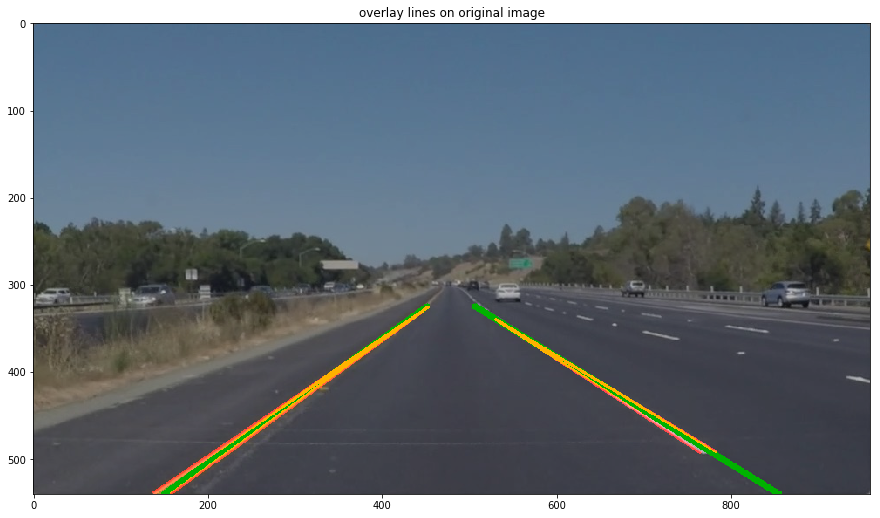

In [18]:
img_gbcrlw=weighted_img(img_gbcrl, img, a=.7, b=1, gamma=0.0)
plt.imshow(img_gbcrlw,cmap='gray') 
plt.title('overlay lines on original image', fontdict=None, loc='center')
cv2.imwrite("test_videos_output/img_gbcrlw.jpg",cv2.cvtColor(img_gbcrlw, cv2.COLOR_RGB2BGR))

# Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
def process_image(img):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    img_g= grayscale(img)
    img_gb=gaussian_blur(img_g, 9)
    img_gbc=canny(img_gb, 40, 80);
    vertices=get_region_of_interest_vertices(img_gbc);
    img_gbcr=region_of_interest(img_gbc,vertices)
    img_gbcrl=hough_lines(img_gbcr, 1, np.pi/180.0, int(img_gbcr.shape[0]*.06), img_gbcr.shape[0]*1.4*0.1, img_gbcr.shape[0]*1.4*0.55)
    img_gbcrlw=weighted_img(img_gbcrl, img, a=.7, b=1, gamma=0.0)
    return img_gbcrlw

Let's try the one with the solid white lane on the right first ...

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:03<00:00, 56.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 4.54 s, sys: 462 ms, total: 5 s
Wall time: 4.14 s


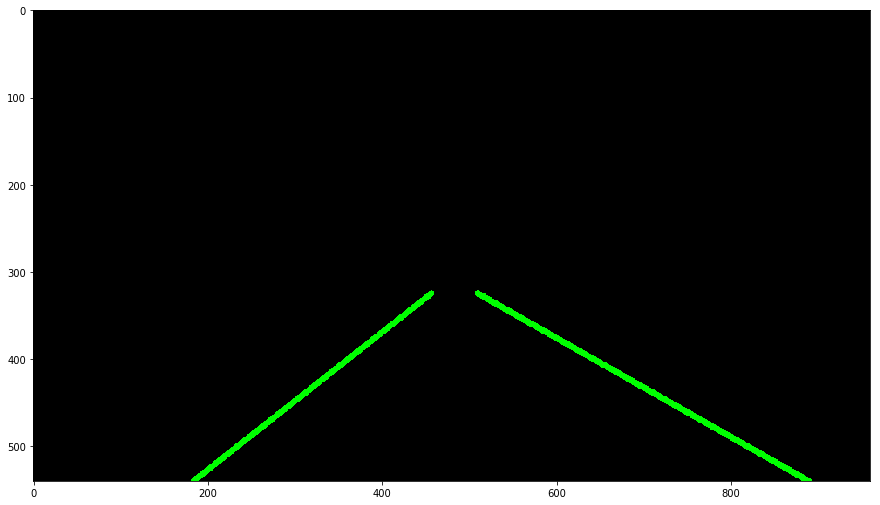

In [21]:
white_output = 'test_videos_output/solidWhiteRight.mp4'

## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [23]:
from collections import deque
m_left_deque = deque(maxlen=10)      # make a new deque with 10 items to store slope m for left lane
b_left_deque = deque(maxlen=10)      # store offset b for left lane
m_right_deque = deque(maxlen=10)      # make a new deque with 10 items to store slope m for right lane
b_right_deque = deque(maxlen=10)      # store offset b for right lane

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:12<00:00, 52.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 14.7 s, sys: 1.13 s, total: 15.9 s
Wall time: 13.2 s


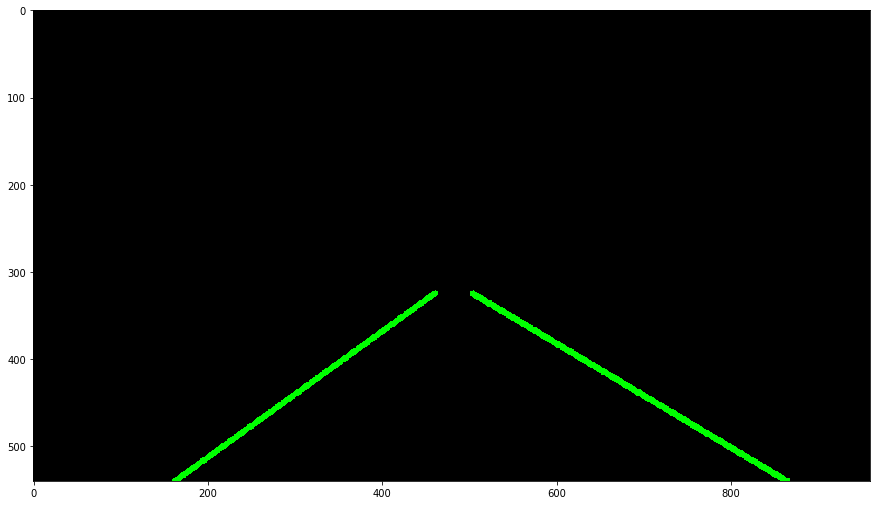

In [24]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'

## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [25]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [26]:
from collections import deque
m_left_deque = deque(maxlen=10)      # make a new deque with 10 items to store slope m for left lane
b_left_deque = deque(maxlen=10)      # store offset b for left lane
m_right_deque = deque(maxlen=10)      # make a new deque with 10 items to store slope m for right lane
b_right_deque = deque(maxlen=10)      # store offset b for right lane

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [00:10<00:00, 23.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 1min 23s, sys: 2.35 s, total: 1min 26s
Wall time: 11.2 s


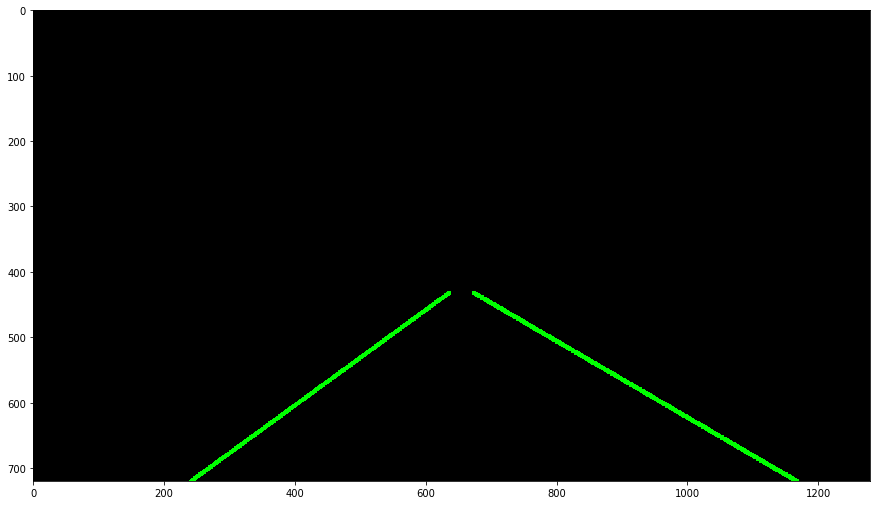

In [27]:
challenge_output = 'test_videos_output/challenge.mp4'

## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [28]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

# Additional helper tools
### Get one frame from video so that size parameters for lane are correctly scaled.

In [29]:
### this is a way to get frames from a video
#import cv2
#print(cv2.__version__)
#vidcap = cv2.VideoCapture('test_videos/challenge.mp4')
#success,image = vidcap.read()
#count = 0
#success = True
#while success:
#  cv2.imwrite("test_images/frame%d.jpg" % count, image)     # save frame as JPEG file
#  success,image = vidcap.read()
#  #print ('Read a new frame: ', success)
#  count += 1

In [30]:
#!pwd
#!rm f*.jpg
#!ls
#cd test_images
#cd ..